## ¿Qué tipos de prestación médica son más frecuentes entre diferentes tramos de edad y género?

En el ámbito de la salud pública, entender qué tipos de prestaciones médicas son más frecuentes según los tramos de edad y géneros es crucial para identificar patrones de uso de servicios de salud. Estos patrones reflejan las necesidades médicas específicas de diferentes grupos poblacionales, lo que permite:

- Mejorar la planificación sanitaria: Identificar qué prestaciones son más utilizadas ayuda a asignar recursos de manera más eficiente, optimizando la disponibilidad de servicios médicos según las demandas específicas de cada grupo etario y género.

- Detectar inequidades: Analizar diferencias entre géneros y tramos de edad puede revelar desigualdades en el acceso o utilización de servicios de salud, proporcionando datos para tomar decisiones informadas en políticas públicas.

- Prevenir problemas de salud: Al comprender qué prestaciones se solicitan con mayor frecuencia, se pueden diseñar intervenciones preventivas dirigidas a las necesidades predominantes de cada grupo.

Esta pregunta es especialmente relevante en contextos donde se busca personalizar los servicios de salud, mejorar la cobertura de los grupos más vulnerables y hacer un uso más estratégico de los recursos médicos.

### ¿Por qué elegimos estas variables?, ¿qué representan?

Las variables seleccionadas permiten analizar la relación entre el uso de servicios médicos y las características demográficas clave de la población:

- Tramo de edad:

Representa los diferentes grupos etarios de la población, segmentados para reflejar etapas de vida (infancia, adolescencia, adultez, vejez).
Es fundamental porque las necesidades médicas y la demanda de servicios cambian considerablemente con la edad. Por ejemplo, los adultos mayores pueden requerir más atenciones relacionadas con enfermedades crónicas, mientras que los niños suelen usar servicios preventivos o de vacunación.

- Género:

Permite observar diferencias en el uso de prestaciones entre hombres, mujeres y otras identidades de género.
Esta variable es crucial porque existen diferencias biológicas, sociales y culturales que influyen en cómo las personas acceden y utilizan los servicios de salud. Por ejemplo, las mujeres suelen requerir servicios asociados con la salud reproductiva, mientras que los hombres pueden estar subutilizando ciertos servicios preventivos.

- Tipo de prestación médica:

Identifica el servicio o atención recibida (por ejemplo, consultas generales, hospitalizaciones, urgencias, procedimientos específicos).
Representa el núcleo del análisis, ya que las prestaciones reflejan directamente las necesidades de salud de la población.
La combinación de estas variables permite responder preguntas clave sobre cómo los grupos demográficos utilizan los servicios médicos y cómo estos patrones podrían estar relacionados con factores biológicos, culturales o estructurales.

In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [290]:
#Lectura archivo mle 2023
mle_2023 = pd.read_csv(r'data\sample\MLE_2023_sample_limpio.csv', encoding='latin-1')
mle_2023.head()

,MES_EMISION,CODIGO_PRESTACIÓN,DESC_SECCION,DESC_ITEM,CODIGO_BENEFICIARIO,TRAMO_FONASA,EDAD_TRAMO,SEXO,REGION_EMISION,COMUNA_EMISION,PRESTACIONES,MONTO_FAM,MONTO_COPAGO,NOMBRE_PRESTACIÓN
0,202305,309022,Exámenes De Diagnóstico,Laboratorio Clínico,97481406,D,35 a 39 años,Mujer,Metropolitana De Santiago,La Cisterna,1.0,890,900,"ORINA COMPLETA, (INCLUYE COD. 03-09-023 Y 03-0..."
1,202305,302023,Exámenes De Diagnóstico,Laboratorio Clínico,76712895,X,50 a 54 años,Hombre,De Tarapacá,Iquique,1.0,630,1390,CREATININA EN SANGRE ...
2,202305,302023,Exámenes De Diagnóstico,Laboratorio Clínico,69353764,B,50 a 54 años,Mujer,Metropolitana De Santiago,San Joaquín,1.0,630,1390,CREATININA EN SANGRE ...
3,202305,302023,Exámenes De Diagnóstico,Laboratorio Clínico,76007327,B,55 a 59 años,Mujer,Del Bíobío,Curanilahue,1.0,630,1390,CREATININA EN SANGRE ...
4,202305,302023,Exámenes De Diagnóstico,Laboratorio Clínico,81474165,B,55 a 59 años,Mujer,Metropolitana De Santiago,Las Condes,1.0,630,1390,CREATININA EN SANGRE ...


Identificamos valores únicos:

In [292]:
mle_2023['EDAD_TRAMO'].unique()

array(['35 a 39 años', '50 a 54 años', '55 a 59 años', '20 a 24 años',
       '85 a 89 años', '45 a 49 años', '60 a 64 años', '25 a 29 años',
       '30 a 34 años', '05 a 09 años', '10 a 14 años', '15 a 19 años',
       '40 a 44 años', '65 a 69 años', '70 a 74 años', '75 a 79 años',
       '80 a 84 años', '90 a 94 años', '00 a 02 años', '03 a 04 años',
       '95 a 99 años', 'Más de 99 años'], dtype=object)

In [293]:
mle_2023['NOMBRE_PRESTACIÓN'].unique()

array(['ORINA COMPLETA, (INCLUYE COD. 03-09-023 Y 03-09-024)        ',
       'CREATININA EN SANGRE                                        ',
       'EVALUACION KINESIOLOGICA INTEGRAL                           ',
       'HEMOGRAMA (INCLUYE RECUENTOS DE LEUCOCITOS, ERITROCITOS,    ',
       'INSULINA                                                    ',
       'CONSULTA MEDICA DE ESPECIALIDAD EN MEDICINA FAMILIAR        ',
       'CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                ',
       'CONSULTA MEDICA DE ESPECIALIDAD EN TRAUMATOLOGIA Y ORTOPEDIA',
       'CONSULTA MEDICA DE ESPECIALIDAD EN NEFROLOGIA PEDIATRICO    ',
       'CONSULTA MEDICA DE ESPECIALIDAD EN MEDICINA DE URGENCIA     ',
       'CONSULTA MEDICA DE ESPECIALIDAD EN CIRUGIA GENERAL          ',
       'CONSULTA MEDICA DE ESPECIALIDAD EN MEDICINA INTERNA         ',
       'CONSULTA MEDICA DE ESPECIALIDAD EN DIABETOLOGIA             ',
       'CONSULTA MEDICA DE ESPECIALIDAD EN OBSTETRICIA Y GINECOLOGIA',
      

#### PRESTACIONES MÁS FRECUENTES POR TRAMOS DE EDAD:

In [294]:
# Agrupamos Tipos de prestación médica más frecuentes por tramo de edad
mle_2023.groupby('EDAD_TRAMO')['NOMBRE_PRESTACIÓN'].value_counts() 

EDAD_TRAMO      NOMBRE_PRESTACIÓN                                           
00 a 02 años    CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                    1195
                CONSULTA MEDICINA GENERAL                                        578
                RADIOGRAFIA DE TORAX FRONTAL Y LATERAL                            66
                VENOSA EN NIÑOS Y LACTANTES                                       45
                RADIOGRAFIA DE PELVIS, CADERA O COXOFEMORAL DE RN, LACTANTE       38
                                                                                ... 
Más de 99 años  PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12                1
                PROTEINA C REACTIVA POR TECNICAS AUTOMATIZADAS                     1
                RADIOGRAFIA DE PELVIS, CADERA O COXOFEMORAL                        1
                VENOSA EN ADULTOS                                                  1
                VISITA MEDICA DOMICILIARIA EN HORARIO HABIL              

Dado que son muchos los tipos de prestación médica, vamos a filtrar los 3 más frecuentes por tramo de edad.

In [295]:
# 3 prestaciones más frecuentes por tramo edad
mle_2023.groupby('EDAD_TRAMO')['NOMBRE_PRESTACIÓN'].value_counts().groupby('EDAD_TRAMO').head(3)

EDAD_TRAMO      NOMBRE_PRESTACIÓN                                           
00 a 02 años    CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                    1195
                CONSULTA MEDICINA GENERAL                                        578
                RADIOGRAFIA DE TORAX FRONTAL Y LATERAL                            66
03 a 04 años    CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                     472
                CONSULTA MEDICINA GENERAL                                        417
                                                                                ... 
95 a 99 años    PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12               11
                PERFIL HEPATICO (INCLUYE TIEMPO DE PROTROMBINA, BILIRRUBINA       11
Más de 99 años  NITROGENO UREICO Y/O UREA, EN SANGRE                               2
                BILIRRUBINA TOTAL Y CONJUGADA                                      1
                CONSULTA MEDICA DE ESPECIALIDAD EN CIRUGIA GENERAL       

Separamos grupos etarios para facilitar el análisis clasificándolos en 4 grupos principales:
- Grupo 1: los tramos de 00 a 09 años (niñez)
- Grupo 2: los tramos de 10 a 19 años (adolescencia)
- Grupo 3: los tramos de 20 a 59 años (adultez)
- Grupo 4: los tramos de 60 a +99 años (vejez)

In [300]:
# Agrupamos los tramos de edad
grupo1 = ['00 a 02 años', '03 a 04 años', '05 a 09 años']
grupo2 = ['10 a 14 años', '15 a 19 años'] 
grupo3 = ['20 a 24 años', '25 a 29 años', '30 a 34 años', '35 a 39 años', '40 a 44 años', '45 a 49 años', '50 a 54 años', '55 a 59 años']
grupo4 = ['60 a 64 años', '65 a 69 años', '70 a 74 años', '75 a 79 años', '80 a 84 años', '85 a 89 años', '90 a 94 años', '95 a 99 años', 'Más de 99 años']

# Filtramos los datos
grupo1 = mle_2023[mle_2023['EDAD_TRAMO'].isin(grupo1)]
grupo2 = mle_2023[mle_2023['EDAD_TRAMO'].isin(grupo2)]
grupo3 = mle_2023[mle_2023['EDAD_TRAMO'].isin(grupo3)]
grupo4 = mle_2023[mle_2023['EDAD_TRAMO'].isin(grupo4)]

##### Grupo 1:

In [301]:
# 3 prestaciones más frecuentes por tramo edad en grupo1 niñez
grupo1.groupby('EDAD_TRAMO')['NOMBRE_PRESTACIÓN'].value_counts().groupby('EDAD_TRAMO').head(3)

EDAD_TRAMO    NOMBRE_PRESTACIÓN                                           
00 a 02 años  CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                    1195
              CONSULTA MEDICINA GENERAL                                        578
              RADIOGRAFIA DE TORAX FRONTAL Y LATERAL                            66
03 a 04 años  CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                     472
              CONSULTA MEDICINA GENERAL                                        417
              CONSULTA MEDICA DE ESPECIALIDAD EN OTORRINOLARINGOLOGIA           48
05 a 09 años  CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                     857
              CONSULTA MEDICINA GENERAL                                        844
              CONSULTA MEDICA DE ESPECIALIDAD EN OFTALMOLOGIA                  134
Name: count, dtype: int64

In [302]:
# Filtramos las 5 prestaciones más frecuentes en grupo1 niñez
grupo1['NOMBRE_PRESTACIÓN'].value_counts().head(5)

NOMBRE_PRESTACIÓN
CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                    2524
CONSULTA MEDICINA GENERAL                                       1839
CONSULTA MEDICA DE ESPECIALIDAD EN OFTALMOLOGIA                  174
CONSULTA MEDICA DE ESPECIALIDAD EN OTORRINOLARINGOLOGIA          168
RADIOGRAFIA DE TORAX FRONTAL Y LATERAL                           149
Name: count, dtype: int64

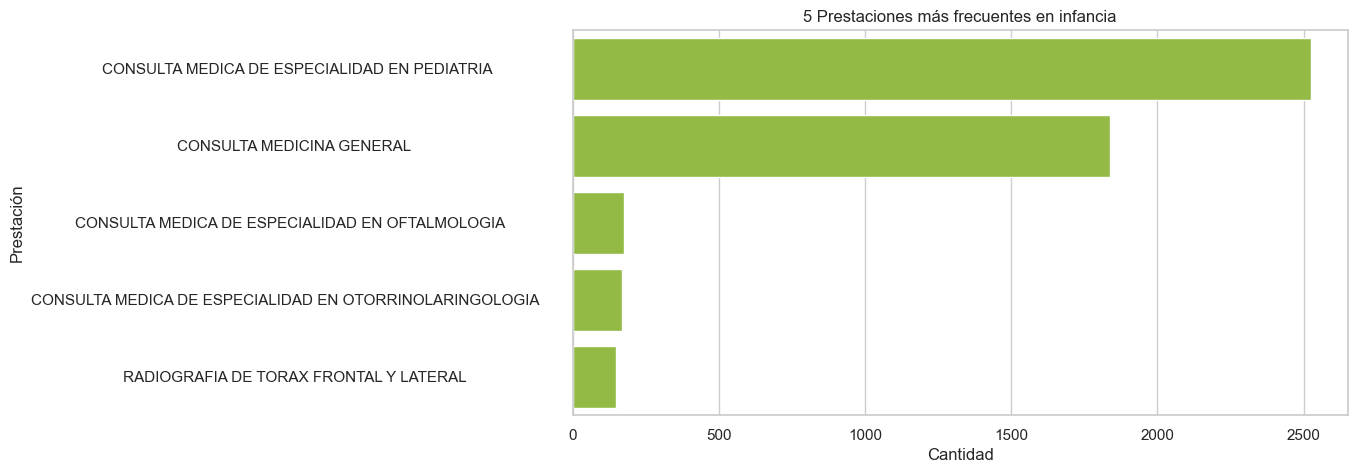

In [303]:
# Graficamos las 5 prestaciones más frecuentes del grupo1 niñez
plt.figure(figsize=(10, 5))
sns.countplot(data=grupo1, y='NOMBRE_PRESTACIÓN', order=grupo1['NOMBRE_PRESTACIÓN'].value_counts().index[:5], color='yellowgreen')
plt.title('5 Prestaciones más frecuentes en infancia')
plt.xlabel('Cantidad')
plt.ylabel('Prestación')
plt.show()

En el grupo1 de niñez, las prestaciones más frecuentes son las relacionadas con vacunación y controles pediátricos.

##### Grupo 2: 

In [ ]:
# Filtramos las 5 prestaciones más frecuentes en el grupo2 adolescencia
grupo2['NOMBRE_PRESTACIÓN'].value_counts().head(5)

NOMBRE_PRESTACIÓN
CONSULTA MEDICINA GENERAL                                       1417
CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                     426
PERFIL HEPATICO (INCLUYE TIEMPO DE PROTROMBINA, BILIRRUBINA      221
PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12              217
PSICOTERAPIA INDIVIDUAL                                          208
Name: count, dtype: int64

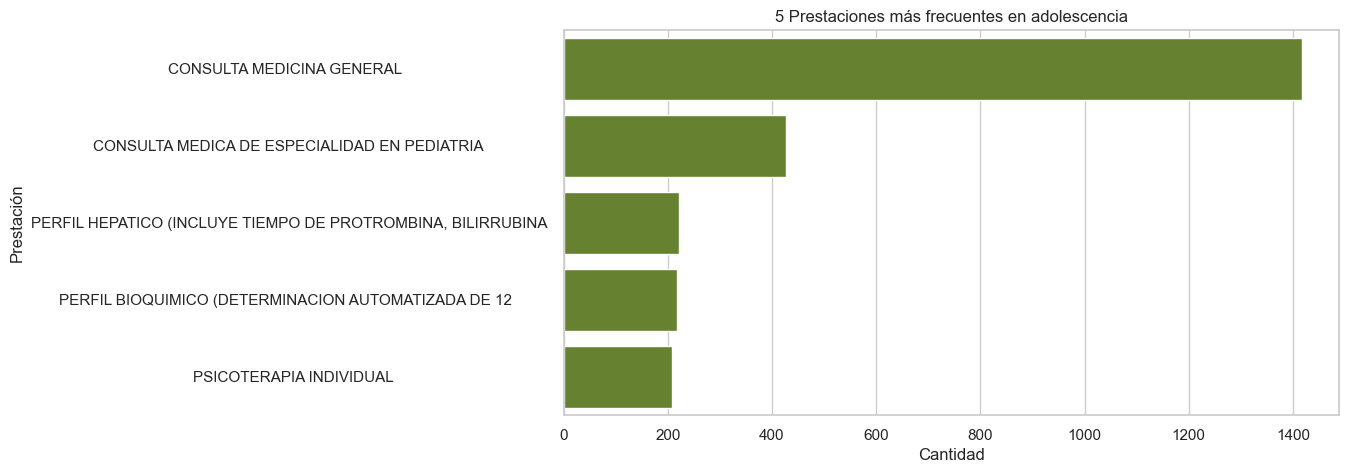

In [316]:
# Graficamos las 5 prestaciones más frecuentes del grupo2 adolescencia
plt.figure(figsize=(10, 5))
sns.countplot(data=grupo2, y='NOMBRE_PRESTACIÓN', order=grupo2['NOMBRE_PRESTACIÓN'].value_counts().index[:5], color='olivedrab')
plt.title('5 Prestaciones más frecuentes en adolescencia')
plt.xlabel('Cantidad')
plt.ylabel('Prestación')
plt.show()

En el grupo2 de adolescencia, las prestaciones más frecuentes son las relacionadas con controles médicos y vacunación.


##### Grupo 3:

In [306]:
grupo3.groupby('EDAD_TRAMO')['NOMBRE_PRESTACIÓN'].value_counts().groupby('EDAD_TRAMO').head(3)

EDAD_TRAMO    NOMBRE_PRESTACIÓN                                           
20 a 24 años  CONSULTA MEDICINA GENERAL                                       1021
              CONSULTA MEDICA DE ESPECIALIDAD EN OBSTETRICIA Y GINECOLOGIA     371
              PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12              192
25 a 29 años  CONSULTA MEDICINA GENERAL                                       1609
              CONSULTA MEDICA DE ESPECIALIDAD EN OBSTETRICIA Y GINECOLOGIA     563
              PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12              237
30 a 34 años  CONSULTA MEDICINA GENERAL                                       1699
              CONSULTA MEDICA DE ESPECIALIDAD EN OBSTETRICIA Y GINECOLOGIA     615
              VENOSA EN ADULTOS                                                250
35 a 39 años  CONSULTA MEDICINA GENERAL                                       1319
              CONSULTA MEDICA DE ESPECIALIDAD EN OBSTETRICIA Y GINECOLOGIA     425
            

In [310]:
# Filtramos las 5 prestaciones más frecuentes en el grupo3 adultez
grupo3['NOMBRE_PRESTACIÓN'].value_counts().head(5)

NOMBRE_PRESTACIÓN
CONSULTA MEDICINA GENERAL                                       10361
CONSULTA MEDICA DE ESPECIALIDAD EN OBSTETRICIA Y GINECOLOGIA     2889
PERFIL HEPATICO (INCLUYE TIEMPO DE PROTROMBINA, BILIRRUBINA      1908
PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12              1780
VENOSA EN ADULTOS                                                1731
Name: count, dtype: int64

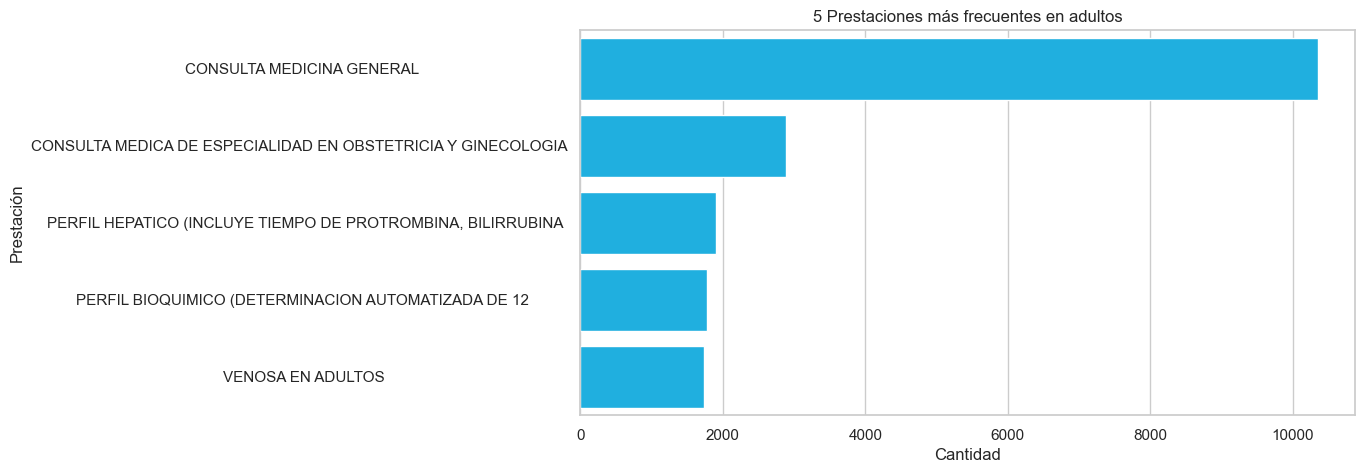

In [311]:
# Graficamos las 5 prestaciones más frecuentes del grupo3 adultez
plt.figure(figsize=(10, 5))
sns.countplot(data=grupo3, y='NOMBRE_PRESTACIÓN', order=grupo3['NOMBRE_PRESTACIÓN'].value_counts().index[:5], color='deepskyblue')
plt.title('5 Prestaciones más frecuentes en adultos')
plt.xlabel('Cantidad')
plt.ylabel('Prestación')
plt.show()

En el grupo3 de adultos, las prestaciones más frecuentes son las relacionadas con controles médicos y vacunación.


##### Grupo 4:

In [312]:
grupo4.groupby('EDAD_TRAMO')['NOMBRE_PRESTACIÓN'].value_counts().groupby('EDAD_TRAMO').head(3)

EDAD_TRAMO      NOMBRE_PRESTACIÓN                                           
60 a 64 años    CONSULTA MEDICINA GENERAL                                       938
                CONSULTA MEDICA DE ESPECIALIDAD EN TRAUMATOLOGIA Y ORTOPEDIA    292
                VENOSA EN ADULTOS                                               280
65 a 69 años    CONSULTA MEDICINA GENERAL                                       809
                VENOSA EN ADULTOS                                               282
                PERFIL HEPATICO (INCLUYE TIEMPO DE PROTROMBINA, BILIRRUBINA     269
70 a 74 años    CONSULTA MEDICINA GENERAL                                       664
                VENOSA EN ADULTOS                                               247
                PERFIL HEPATICO (INCLUYE TIEMPO DE PROTROMBINA, BILIRRUBINA     208
75 a 79 años    CONSULTA MEDICINA GENERAL                                       442
                VENOSA EN ADULTOS                                               207

In [313]:
# Filtramos las 5 prestaciones más frecuentes en el grupo4 vejez
grupo4['NOMBRE_PRESTACIÓN'].value_counts().head(5)

NOMBRE_PRESTACIÓN
CONSULTA MEDICINA GENERAL                                       3395
VENOSA EN ADULTOS                                               1245
PERFIL HEPATICO (INCLUYE TIEMPO DE PROTROMBINA, BILIRRUBINA     1099
CONSULTA MEDICA DE ESPECIALIDAD EN OFTALMOLOGIA                  943
PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12              943
Name: count, dtype: int64

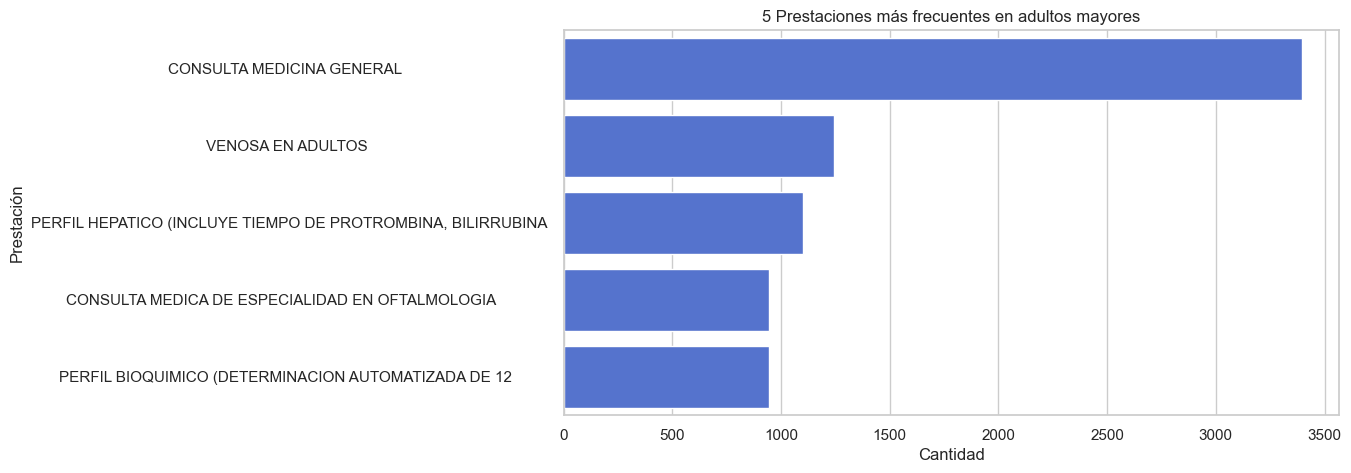

In [314]:
# Graficamos las 5 prestaciones más frecuentes del grupo etario de adultos mayores
plt.figure(figsize=(10, 5))
sns.countplot(data=grupo4, y='NOMBRE_PRESTACIÓN', order=grupo4['NOMBRE_PRESTACIÓN'].value_counts().index[:5], color='royalblue')
plt.title('5 Prestaciones más frecuentes en adultos mayores')
plt.xlabel('Cantidad')
plt.ylabel('Prestación')
plt.show()

En el grupo4 de adultos mayores, las prestaciones más frecuentes son las relacionadas con controles médicos y vacunación.

#### PRESTACIONES MÁS FRECUENTES POR GÉNERO:

In [285]:
# Tipos de prestación médica más frecuentes por género
mle_2023.groupby('SEXO')['NOMBRE_PRESTACIÓN'].value_counts()

SEXO    NOMBRE_PRESTACIÓN                                           
Hombre  CONSULTA MEDICINA GENERAL                                       6314
        CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                    1551
        PERFIL HEPATICO (INCLUYE TIEMPO DE PROTROMBINA, BILIRRUBINA     1220
        CONSULTA MEDICA DE ESPECIALIDAD EN TRAUMATOLOGIA Y ORTOPEDIA    1079
        PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12             1069
                                                                        ... 
Mujer   VARICES                                                            1
        VASCULOPATIA RETINAL (EXCEPTO RETINOPATIA PROLIFERATIVA)           1
        VIA LAGRIMAL, CATETERISMO O SONDAJE EN ADULTOS                     1
        VOLUMENES PULMONARES POR LAVADO DE NITROGENO                       1
        VULVECTOMIA SIMPLE                                                 1
Name: count, Length: 1339, dtype: int64

In [286]:
# 10 prestaciones más frecuentes por género femenino
mle_2023[mle_2023['SEXO'] == 'Mujer']['NOMBRE_PRESTACIÓN'].value_counts().head(10)

NOMBRE_PRESTACIÓN
CONSULTA MEDICINA GENERAL                                       10698
CONSULTA MEDICA DE ESPECIALIDAD EN OBSTETRICIA Y GINECOLOGIA     3349
PERFIL HEPATICO (INCLUYE TIEMPO DE PROTROMBINA, BILIRRUBINA      2089
VENOSA EN ADULTOS                                                2009
PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12              1985
CONSULTA MEDICA DE ESPECIALIDAD EN TRAUMATOLOGIA Y ORTOPEDIA     1649
CONSULTA MEDICA DE ESPECIALIDAD EN OFTALMOLOGIA                  1620
CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                     1399
25 OH VITAMINA D TOTAL POR INMUNOENSAYO                          1265
HEMOGRAMA (INCLUYE RECUENTOS DE LEUCOCITOS, ERITROCITOS,         1152
Name: count, dtype: int64

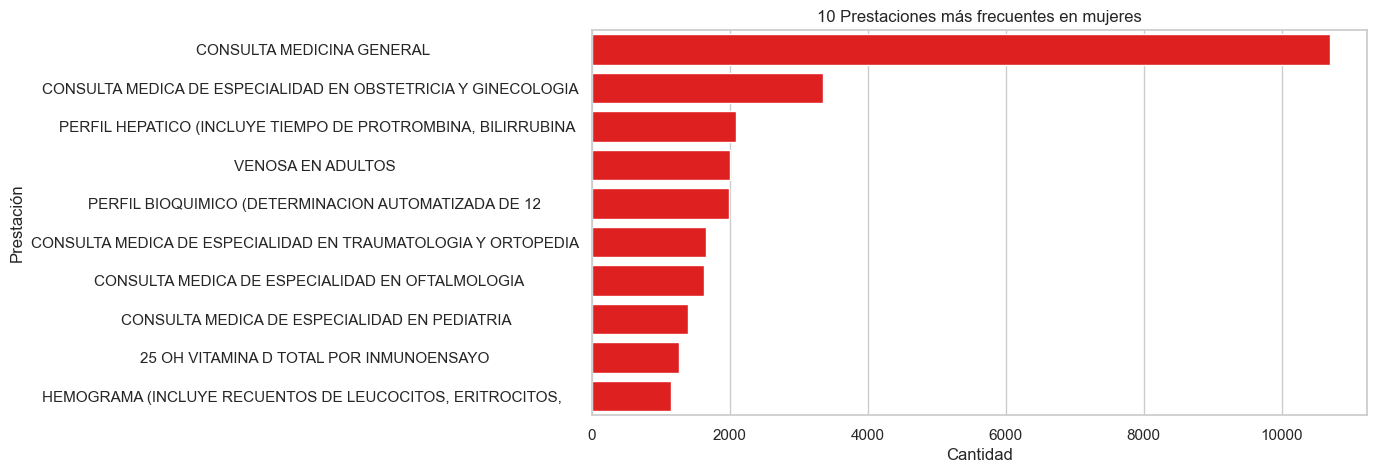

In [287]:
# Graficamos en un gráfico de barras lateral para las 10 prestaciones más frecuentes del género femenino
plt.figure(figsize=(10, 5))
sns.countplot(data=mle_2023[mle_2023['SEXO'] == 'Mujer'], y='NOMBRE_PRESTACIÓN', order=mle_2023[mle_2023['SEXO'] == 'Mujer']['NOMBRE_PRESTACIÓN'].value_counts().index[:10], color='red')
plt.title('10 Prestaciones más frecuentes en mujeres')
plt.xlabel('Cantidad')
plt.ylabel('Prestación')
plt.show()

In [288]:
# 10 prestaciones más frecuentes por género masculino
mle_2023[mle_2023['SEXO'] == 'Hombre']['NOMBRE_PRESTACIÓN'].value_counts().head(10)

NOMBRE_PRESTACIÓN
CONSULTA MEDICINA GENERAL                                       6314
CONSULTA MEDICA DE ESPECIALIDAD EN PEDIATRIA                    1551
PERFIL HEPATICO (INCLUYE TIEMPO DE PROTROMBINA, BILIRRUBINA     1220
CONSULTA MEDICA DE ESPECIALIDAD EN TRAUMATOLOGIA Y ORTOPEDIA    1079
PERFIL BIOQUIMICO (DETERMINACION AUTOMATIZADA DE 12             1069
VENOSA EN ADULTOS                                               1058
CONSULTA MEDICA DE ESPECIALIDAD EN OFTALMOLOGIA                  979
CONSULTA MEDICA DE ESPECIALIDAD EN UROLOGIA                      964
ANTIGENO PROSTATICO ESPECIFICO                                   944
CREATININA EN SANGRE                                             627
Name: count, dtype: int64

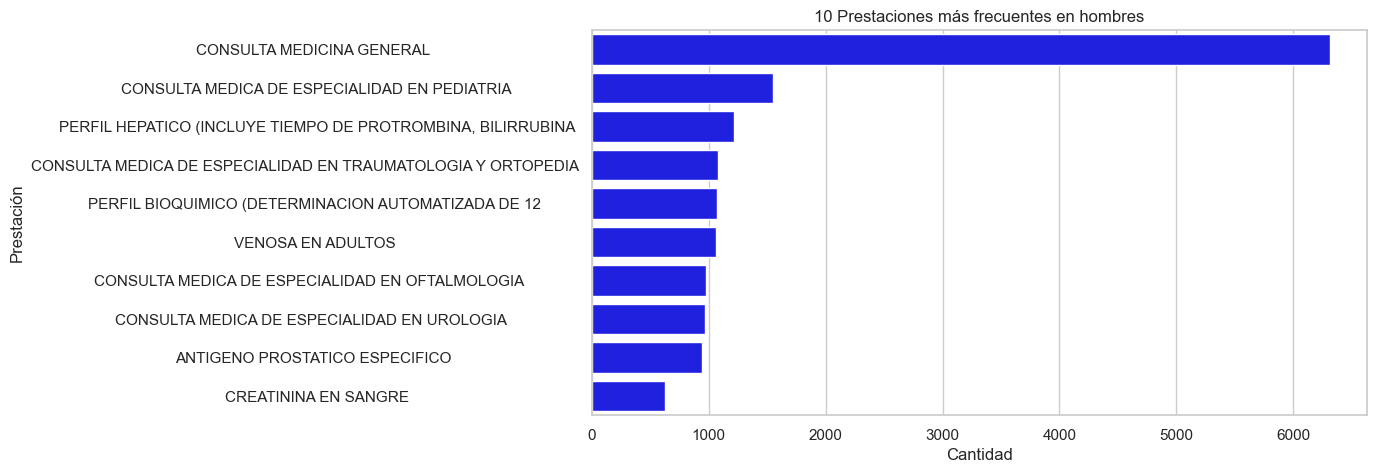

In [289]:
# Graficamos en un gráfico de barras lateral para las 10 prestaciones más frecuentes del género masculino
plt.figure(figsize=(10, 5))
sns.countplot(data=mle_2023[mle_2023['SEXO'] == 'Hombre'], y='NOMBRE_PRESTACIÓN', order=mle_2023[mle_2023['SEXO'] == 'Hombre']['NOMBRE_PRESTACIÓN'].value_counts().index[:10], color='blue')
plt.title('10 Prestaciones más frecuentes en hombres')
plt.xlabel('Cantidad')
plt.ylabel('Prestación')
plt.show()

#### Análisis general:

##### Edad
El análisis de las prestaciones médicas según el rango etario refleja patrones esperados basados en las necesidades de salud asociadas a cada etapa de la vida:

- En las edades más bajas, predominan las atenciones relacionadas con pediatría y consulta general, lo cual es coherente con el seguimiento del desarrollo infantil, la vacunación y la atención de enfermedades comunes en la infancia.
- La prestación de psicoterapia aparece exclusivamente en el grupo de adolescentes, lo que subraya la relevancia de abordar problemas emocionales y de salud mental en esta etapa crítica de desarrollo.
- Las prestaciones como consulta general, perfil hepático y perfil bioquímico se mantienen frecuentes en todos los grupos etarios. Esto puede explicarse por su uso en chequeos rutinarios o como parte de estrategias preventivas para monitorear la salud general de la población.

##### Género 
El análisis de la distribución de prestaciones médicas entre géneros evidencia diferencias notables:

- Las mujeres acceden a más atenciones médicas que los hombres, con una diferencia significativa en la prestación más demandada (10,000 atenciones para mujeres frente a 6,000 para hombres en el top 1).
- Las prestaciones de obstetricia y ginecología son claramente predominantes en las mujeres, lo que refleja necesidades relacionadas con la salud reproductiva y materna.
- El perfil hepático, asociado a chequeos generales o diagnósticos específicos, resulta una prestación común entre ambos géneros, lo que indica su relevancia en el monitoreo de la salud hepática independientemente del género.
- En el caso de pediatría, se observa una mayor cantidad de consultas para hombres que para mujeres. Este patrón podría estar vinculado a diferencias biológicas, sociales o culturales en el acceso o la demanda de estos servicios para niños y niñas.